In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import time
import datetime
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving profi train.csv to profi train.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving profi test.csv to profi test.csv


In [ ]:
train = pd.read_csv('profi train.csv')
test = pd.read_csv('profi test.csv')

print(train.shape, test.shape)

(309, 12) (133, 11)


In [ ]:
train

,Tectonic regime,Onshore/Offshore,Hydrocarbon type,Reservoir status,Structural setting,Depth,Period,Lithology,Gross,Netpay,Porosity,Permeability
0,STRIKE-SLIP/TRANSPRESSION/BASEMENT-I,OFFSHORE,OIL,DEVELOPING,INVERSION/WRENCH,3520,NEOGENE,SANDSTONE,2460.0,220.0,20.0,45.0
1,GRAVITY/EXTENSION/EVAPORITE,OFFSHORE,OIL,MATURE PRODUCTION,SALT/PASSIVE MARGIN,9967,CRETACEOUS,LIMESTONE,427.0,160.0,19.0,175.0
2,GRAVITY/EXTENSION/EVAPORITE,ONSHORE,OIL,MATURE PRODUCTION,PASSIVE MARGIN,8700,CRETACEOUS,LIMESTONE,95.0,15.0,12.0,20.0
3,COMPRESSION,ONSHORE,OIL,DECLINING PRODUCTION,THRUST,5084,CRETACEOUS,SANDSTONE,328.0,300.0,13.0,600.0
4,INVERSION/COMPRESSION/EXTENSION,ONSHORE,OIL,DECLINING PRODUCTION,INVERSION/RIFT,1030,CRETACEOUS,SANDSTONE,260.0,33.0,24.0,182.0
...,...,...,...,...,...,...,...,...,...,...,...,...
304,GRAVITY/EXTENSION/EVAPORITE/SYNSEDIMENTATION,OFFSHORE,OIL,DECLINING PRODUCTION,DELTA/SUB-SALT/PASSIVE MARGIN,13265,NEOGENE,LOW-RESISTIVITY SANDSTONE,1500.0,295.0,29.0,1500.0
305,INVERSION/COMPRESSION/EXTENSION,OFFSHORE,OIL,DECLINING PRODUCTION,RIFT/PASSIVE MARGIN,1657,CRETACEOUS,LOW-RESISTIVITY SANDSTONE,164.0,98.0,32.0,7500.0
306,COMPRESSION/EVAPORITE,ONSHORE,OIL,CONTINUING DEVELOPMENT,FORELAND,10211,CRETACEOUS,CHALKY LIMESTONE,328.0,213.0,13.0,0.8
307,INVERSION/COMPRESSION/EXTENSION/EVAPORITE,OFFSHORE,GAS-CONDENSATE,PLATEAU PRODUCTION,SALT/RIFT,16360,JURASSIC,SANDSTONE,980.0,490.0,16.0,10.0


In [ ]:
train['Onshore/Offshore'] = train['Onshore/Offshore'].replace(to_replace=['OFFSHORE', 'ONSHORE', 'ONSHORE-OFFSHORE'], value=[0, 1, 2])

In [ ]:
train.head(10)

,Tectonic regime,Onshore/Offshore,Hydrocarbon type,Reservoir status,Structural setting,Depth,Period,Lithology,Gross,Netpay,Porosity,Permeability
0,STRIKE-SLIP/TRANSPRESSION/BASEMENT-I,0,OIL,DEVELOPING,INVERSION/WRENCH,3520,NEOGENE,SANDSTONE,2460.0,220.0,20.0,45.0
1,GRAVITY/EXTENSION/EVAPORITE,0,OIL,MATURE PRODUCTION,SALT/PASSIVE MARGIN,9967,CRETACEOUS,LIMESTONE,427.0,160.0,19.0,175.0
2,GRAVITY/EXTENSION/EVAPORITE,1,OIL,MATURE PRODUCTION,PASSIVE MARGIN,8700,CRETACEOUS,LIMESTONE,95.0,15.0,12.0,20.0
3,COMPRESSION,1,OIL,DECLINING PRODUCTION,THRUST,5084,CRETACEOUS,SANDSTONE,328.0,300.0,13.0,600.0
4,INVERSION/COMPRESSION/EXTENSION,1,OIL,DECLINING PRODUCTION,INVERSION/RIFT,1030,CRETACEOUS,SANDSTONE,260.0,33.0,24.0,182.0
5,COMPRESSION/EXTENSION/EVAPORITE,1,OIL,DECLINING PRODUCTION,INTRACRATONIC,5575,CARBONIFEROUS,DOLOMITE,80.0,46.0,14.0,15.0
6,INVERSION/COMPRESSION/EXTENSION,1,OIL,DEVELOPING,INVERSION/RIFT,5216,PROTEROZOIC,SANDSTONE,200.0,25.0,10.0,209.0
7,INVERSION/COMPRESSION/EXTENSION,0,OIL,DEVELOPING,RIFT,8100,CRETACEOUS,SANDSTONE,115.0,40.0,15.0,30.0
8,COMPRESSION,1,OIL,DECLINING PRODUCTION,INTRACRATONIC,1915,CARBONIFEROUS,LIMESTONE,330.0,20.0,10.0,35.0
9,COMPRESSION,1,OIL,DECLINING PRODUCTION,FORELAND,4150,PERMIAN,DOLOMITE,225.0,200.0,17.5,62.0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Tectonic regime     309 non-null    object 
 1   Onshore/Offshore    309 non-null    int64  
 2   Hydrocarbon type    309 non-null    object 
 3   Reservoir status    309 non-null    object 
 4   Structural setting  309 non-null    object 
 5   Depth               309 non-null    int64  
 6   Period              309 non-null    object 
 7   Lithology           309 non-null    object 
 8   Gross               309 non-null    float64
 9   Netpay              309 non-null    float64
 10  Porosity            309 non-null    float64
 11  Permeability        309 non-null    float64
dtypes: float64(4), int64(2), object(6)
memory usage: 29.1+ KB


In [ ]:
categorical_columns = list(train.select_dtypes(include = 'object'))

In [ ]:
categorical_columns 

['Tectonic regime',
 'Hydrocarbon type',
 'Reservoir status',
 'Structural setting',
 'Period',
 'Lithology']

In [ ]:
X_train = train.drop(columns = ['Onshore/Offshore'])
y_train = train['Onshore/Offshore']

X_test = test.copy()

print(X_train.shape)
print(y_train.shape)

(309, 11)
(309,)


In [ ]:
X_train['label'] = 'train'

X_test['label'] = 'score'

# Concat
concat_df = pd.concat([X_train, X_test])


#for column in categorical_columns:
#  encoded_column = pd.get_dummies(concat_df[column])
#  concat_df = concat_df.join(encoded_column).drop(column, axis=1)

features_df = pd.get_dummies(concat_df, columns=categorical_columns)



X_train = features_df[features_df['label'] == 'train']
X_test = features_df[features_df['label'] == 'score']


X_train = X_train.drop('label', axis=1)
X_test = X_test.drop('label', axis=1)

In [ ]:
numerical_columns = list(train.select_dtypes(include = ['float64', 'int64']))

In [ ]:
numerical_columns

['Onshore/Offshore', 'Depth', 'Gross', 'Netpay', 'Porosity', 'Permeability']

1    211
0     93
2      5
Name: Onshore/Offshore, dtype: int64


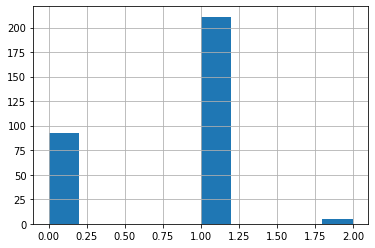

In [ ]:
print(y_train.value_counts())
y_train.hist()

In [ ]:
X_train['Depth'].describe()

count      309.000000
mean      6726.242718
std       3506.266685
min        220.000000
25%       3940.000000
50%       6580.000000
75%       9327.000000
max      18050.000000
Name: Depth, dtype: float64

In [ ]:
upper_lim = X_train['Depth'].quantile(.95)
lower_lim = X_train['Depth'].quantile(.05)

#data.loc[(df[Depth] > upper_lim),Depth] = upper_lim
#data.loc[(df[Depth] < lower_lim),Depth] = lower_lim

In [ ]:
from sklearn.preprocessing import Normalizer

In [ ]:
transformer = Normalizer()

In [ ]:
X_train = transformer.fit_transform(X_train)

In [ ]:
X_test = transformer.fit_transform(X_test)

In [ ]:
X_tt, X_tv, y_tt, y_tv = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
#norma
%%time 
et = ExtraTreesClassifier(random_state=666, class_weight= 'balanced')
et.fit(X_tt, y_tt)
preds_valid = et.predict(X_tv)

print('ExtraTreesClassifier accuracy: ', accuracy_score(y_tv, preds_valid))

ExtraTreesClassifier accuracy:  0.8870967741935484
CPU times: user 128 ms, sys: 4.09 ms, total: 132 ms
Wall time: 134 ms


In [ ]:
%%time 
et = ExtraTreesClassifier(random_state=666, class_weight= 'balanced')
et.fit(X_tt, y_tt)
preds_valid = et.predict(X_tv)

print('ExtraTreesClassifier accuracy: ', accuracy_score(y_tv, preds_valid))

ExtraTreesClassifier accuracy:  0.8709677419354839
CPU times: user 140 ms, sys: 1.87 ms, total: 141 ms
Wall time: 142 ms


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc39b54dc50>]],
      dtype=object)

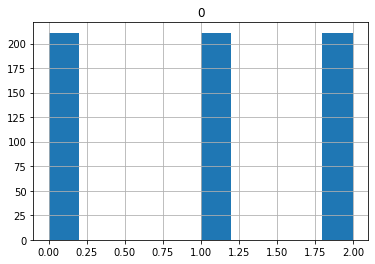

In [ ]:
oversample = RandomOverSampler(sampling_strategy='not majority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train, y_train)
pd.DataFrame(y_over).hist()

In [ ]:
X_tt, X_tv, y_tt, y_tv = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

In [ ]:
%%time 
et = ExtraTreesClassifier(random_state=666, class_weight= 'balanced', n_estimators= 100)
et.fit(X_tt, y_tt)
preds_valid = et.predict(X_tv)

print('ExtraTreesClassifier accuracy: ', accuracy_score(y_tv, preds_valid))

ExtraTreesClassifier accuracy:  0.905511811023622
CPU times: user 173 ms, sys: 1.73 ms, total: 175 ms
Wall time: 177 ms


In [ ]:
#norma
%%time 
et = ExtraTreesClassifier(random_state=666, class_weight= 'balanced', n_estimators= 100)
et.fit(X_tt, y_tt)
preds_valid = et.predict(X_tv)

print('ExtraTreesClassifier accuracy: ', accuracy_score(y_tv, preds_valid))

ExtraTreesClassifier accuracy:  0.952755905511811
CPU times: user 154 ms, sys: 3.73 ms, total: 158 ms
Wall time: 159 ms


In [ ]:
et_fin = et.predict(X_test) 

In [ ]:
et_fin = pd.DataFrame(et_fin)
et_fin = et_fin.replace(to_replace=[0, 1, 2], value=['OFFSHORE', 'ONSHORE', 'ONSHORE-OFFSHORE'])

In [ ]:
et_fin

,0
0,ONSHORE
1,ONSHORE
2,ONSHORE
3,OFFSHORE
4,ONSHORE
...,...
128,OFFSHORE
129,ONSHORE
130,ONSHORE
131,ONSHORE-OFFSHORE


In [ ]:
et_fin.to_csv('prediction.csv',index=False, header = None)

In [ ]:
from google.colab import files
files.download("prediction.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>